In [1]:
import torch
from torch import nn
from torch.autograd import Variable
from torchviz import make_dot, make_dot_from_trace

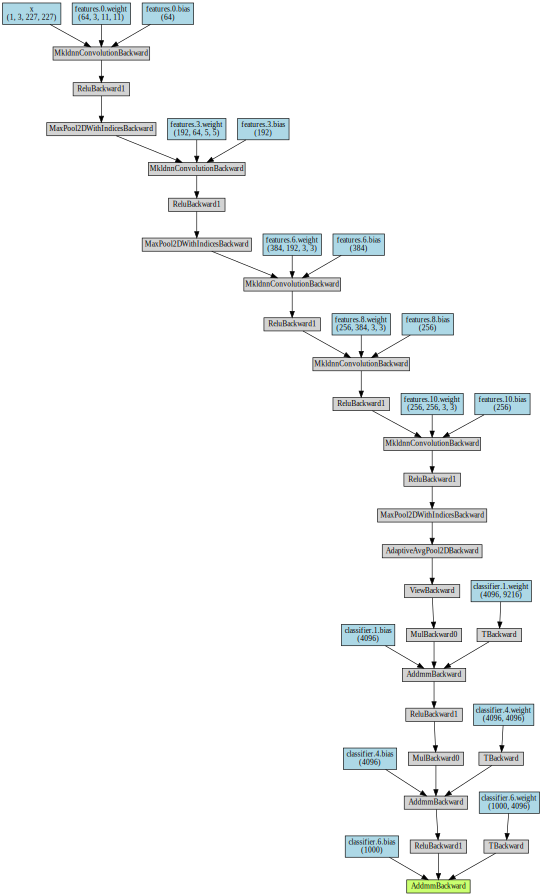

In [2]:
from torchvision.models import AlexNet

model = AlexNet()

x = torch.randn(1, 3, 227, 227).requires_grad_(True)
y = model(x)
make_dot(y, params=dict(list(model.named_parameters()) + [('x', x)]))

In [3]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(model)

+---------------------+------------+
|       Modules       | Parameters |
+---------------------+------------+
|  features.0.weight  |   23232    |
|   features.0.bias   |     64     |
|  features.3.weight  |   307200   |
|   features.3.bias   |    192     |
|  features.6.weight  |   663552   |
|   features.6.bias   |    384     |
|  features.8.weight  |   884736   |
|   features.8.bias   |    256     |
|  features.10.weight |   589824   |
|   features.10.bias  |    256     |
| classifier.1.weight |  37748736  |
|  classifier.1.bias  |    4096    |
| classifier.4.weight |  16777216  |
|  classifier.4.bias  |    4096    |
| classifier.6.weight |  4096000   |
|  classifier.6.bias  |    1000    |
+---------------------+------------+
Total Trainable Params: 61100840


61100840